# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Khoirul Amar Sidik
- **Email:** khoirulamarr@gmail.com
- **ID Dicoding:** khoirulamars

## Menentukan Pertanyaan Bisnis

- 10 produk apa yang paling banyak dibeli?
- 10 produk yang menghasilkan total sales paling tinggi?
- 10 Produk yang mendapat review paling baik dari pelanggan?
- Bagaimana pertumbuhan pemesanan produk dari 5 produk yang paling tinggi?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

<h2><b>Gambar Relasi Data</b></h1>

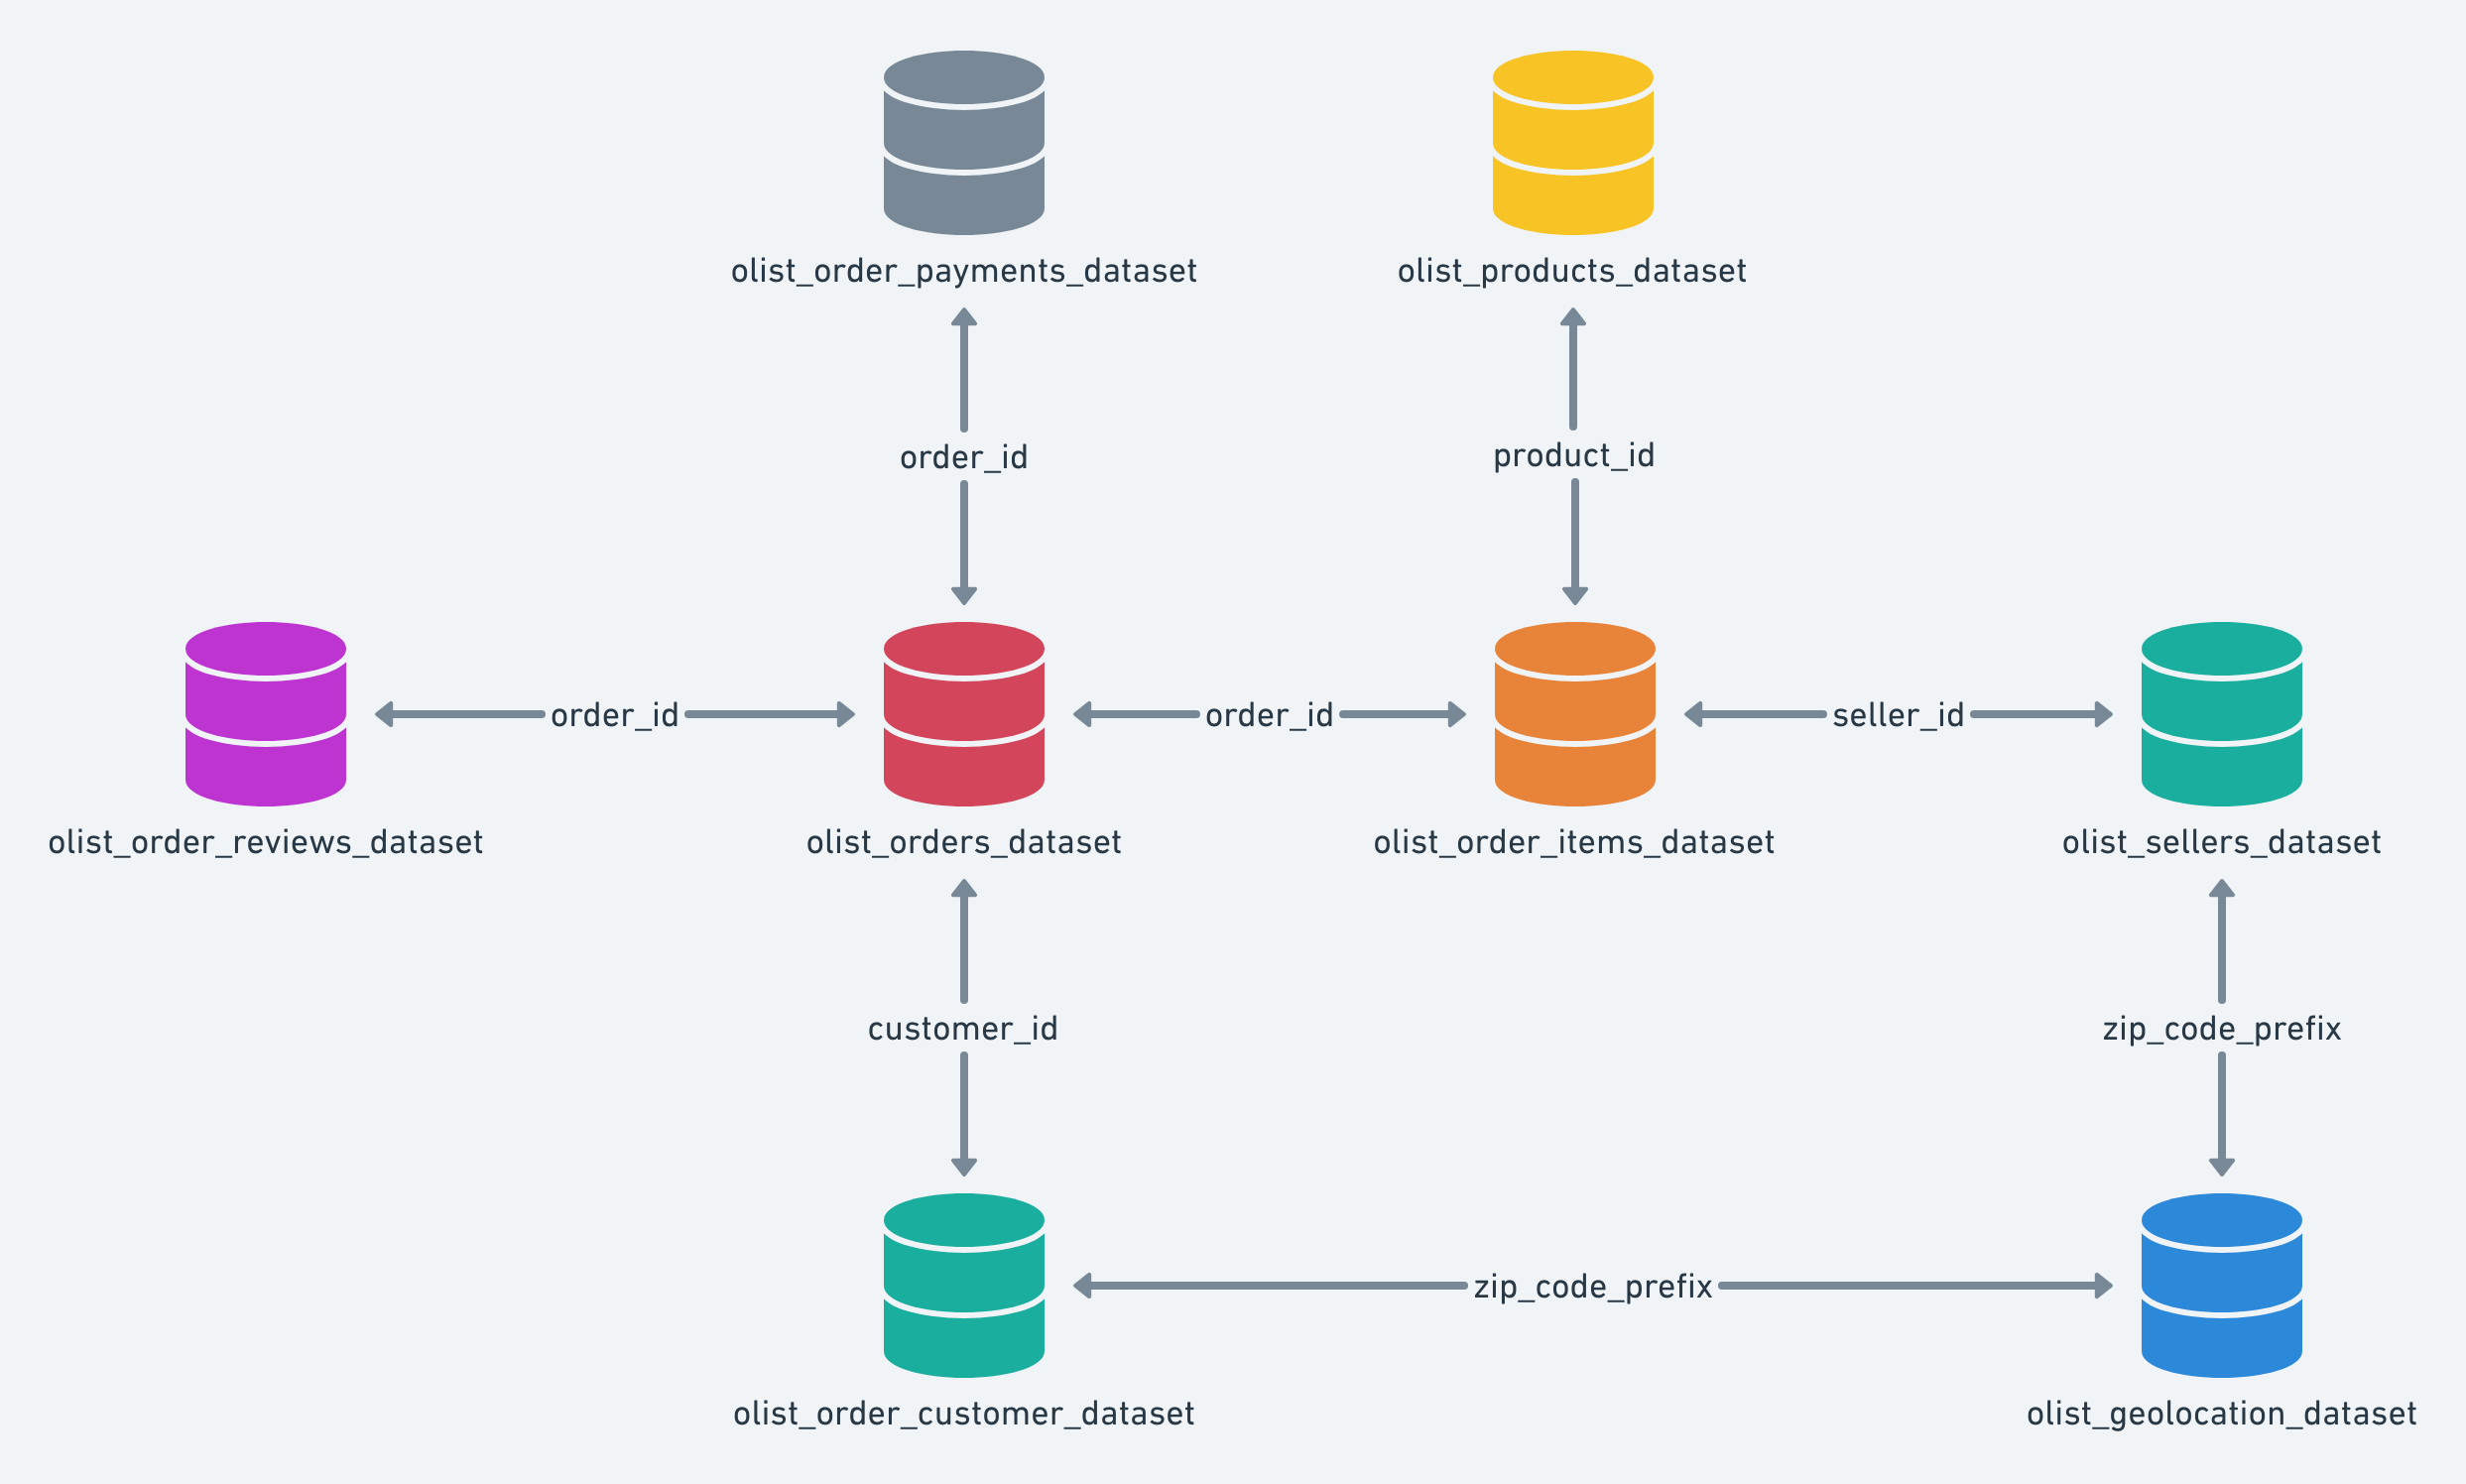

In [17]:
# Load data yang digunakan
df_products = pd.read_csv('D:\dicoding_dataanalysis\Data\products_dataset.csv')
df_order = pd.read_csv('D:\dicoding_dataanalysis\Data\orders_dataset.csv')
df_order_reviews = pd.read_csv('D:\dicoding_dataanalysis\Data\order_reviews_dataset.csv')
df_order_items = pd.read_csv('D:\dicoding_dataanalysis\Data\order_items_dataset.csv')
df_translations = pd.read_csv('D:\dicoding_dataanalysis\Data\product_category_name_translation.csv')

In [18]:
# Melakukan join sesuai gambar relasi dengan dataframe yang diperlukan
join_df = df_products.merge(df_translations, on='product_category_name', how='inner') 
join_df = join_df.merge(df_order_items, on='product_id', how='outer')
join_df = join_df.merge(df_order, on='order_id', how='outer')
join_df = join_df.merge(df_order_reviews, on='order_id', how='outer')

In [19]:
join_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,...,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09 00:00:00,d71da8fd8c6e3adef26be965f065b8a1,5.0,Vale a pena,Super adooorei o delineador ele é bem preto e ...,2018-04-28 00:00:00,2018-05-04 00:55:02
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,...,2017-11-17 21:35:39,2017-11-21 22:14:50,2017-11-23 15:39:38,2017-11-29 00:00:00,0d953190c8ed55747f7b7ad3af2885e3,5.0,NaN,O produto que chegou é mais bonito do que eu e...,2017-11-24 00:00:00,2017-11-24 18:34:45
2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,...,2017-12-08 16:33:14,2017-12-09 00:53:08,2017-12-13 20:52:32,2017-12-18 00:00:00,8e762254a11ad4292ec8fb6586c681cf,2.0,NaN,NaN,2017-12-14 00:00:00,2017-12-17 02:57:05
3,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,...,2017-07-28 09:50:14,2017-07-28 21:42:11,2017-08-08 16:03:45,2017-08-21 00:00:00,de311dfd0cf46c629921db407a7d87e9,5.0,NaN,ótimo produto e ótima loja para comprar pelo s...,2017-08-09 00:00:00,2017-08-09 19:30:09
4,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,...,2018-05-17 10:38:35,2018-06-01 09:04:00,2018-06-07 19:12:50,2018-06-05 00:00:00,097582b6b0630f5cb1a409c223c406dc,3.0,Não passou confiança,"O fornecedor e a nf é de São Paulo, o produto ...",2018-06-07 00:00:00,2018-06-12 13:44:18


### Assessing Data

In [20]:
# mengambil kolom sesuai dengan hal yang ingin dianalisis
df_new = join_df[['product_id',
                  'order_id',
                  'order_purchase_timestamp',
                  'product_category_name_english',
                  'price',
                  'review_score']].copy()
df_new.head()

,product_id,order_id,order_purchase_timestamp,product_category_name_english,price,review_score
0,1e9e8ef04dbcff4541ed26657ea517e5,e17e4f88e31525f7deef66779844ddce,2018-04-24 16:16:53,perfumery,10.91,5.0
1,6a2fb4dd53d2cdb88e0432f1284a004c,048cc42e03ca8d43c729adf6962cb348,2017-11-16 21:28:00,perfumery,16.90,5.0
2,6a2fb4dd53d2cdb88e0432f1284a004c,5fa78e91b5cb84b6a8ccc42733f95742,2017-11-30 01:51:23,perfumery,16.90,2.0
3,0d009643171aee696f4733340bc2fdd0,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,2017-07-28 09:34:29,perfumery,339.00,5.0
4,0d009643171aee696f4733340bc2fdd0,7b13c77c64a9a956500cbf1a9a23798d,2018-05-17 09:24:18,perfumery,275.00,3.0


In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114092 entries, 0 to 114091
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   product_id                     113314 non-null  object 
 1   order_id                       114092 non-null  object 
 2   order_purchase_timestamp       114092 non-null  object 
 3   product_category_name_english  111678 non-null  object 
 4   price                          113314 non-null  float64
 5   review_score                   113131 non-null  float64
dtypes: float64(2), object(4)
memory usage: 6.1+ MB


In [22]:
# Check missing values
df_new.isna().sum()

product_id                        778
order_id                            0
order_purchase_timestamp            0
product_category_name_english    2414
price                             778
review_score                      961
dtype: int64

In [23]:
# check duplicated in column order_id
dup_order_id = df_new.duplicated(subset=['order_id']).sum()
dup_order_id

14651

### Cleaning Data

In [24]:
# Drop missing value
data_clean = df_new.dropna()

# Check Missing Value
check_na = data_clean.isna().sum()
check_na

product_id                       0
order_id                         0
order_purchase_timestamp         0
product_category_name_english    0
price                            0
review_score                     0
dtype: int64

In [25]:
# Handling Duplicated data
df_clean = df_new.drop_duplicates(subset=['order_id'])
dup_order_id = df_clean.duplicated(subset=['order_id']).sum()
dup_order_id

0

In [26]:
df_clean.shape

(99441, 6)

## Exploratory Data Analysis (EDA)

Data manipulation

In [ ]:
df_clean['order_purchase_timestamp'] = pd.to_datetime(df_clean['order_purchase_timestamp'])
df_clean['day'] = df_clean['order_purchase_timestamp'].dt.day
df_clean['month'] = df_clean['order_purchase_timestamp'].dt.month
df_clean['year'] = df_clean['order_purchase_timestamp'].dt.year

In [ ]:
print(min(df_clean['order_purchase_timestamp']))
print(max(df_clean['order_purchase_timestamp']))
df_clean = df_clean.drop(columns = ['order_purchase_timestamp'])

In [ ]:
df_clean.head()

In [43]:
df_clean.to_csv('data.csv')

In [44]:
df_clean.head()

,product_id,order_id,product_category_name_english,price,review_score,day,month,year
0,1e9e8ef04dbcff4541ed26657ea517e5,e17e4f88e31525f7deef66779844ddce,perfumery,10.91,5.0,24,4,2018
1,6a2fb4dd53d2cdb88e0432f1284a004c,048cc42e03ca8d43c729adf6962cb348,perfumery,16.90,5.0,16,11,2017
2,6a2fb4dd53d2cdb88e0432f1284a004c,5fa78e91b5cb84b6a8ccc42733f95742,perfumery,16.90,2.0,30,11,2017
3,0d009643171aee696f4733340bc2fdd0,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,perfumery,339.00,5.0,28,7,2017
4,0d009643171aee696f4733340bc2fdd0,7b13c77c64a9a956500cbf1a9a23798d,perfumery,275.00,3.0,17,5,2018


### Mengetahui 10 produk apa yang paling banyak dibeli.

In [33]:
top_10_order = df_clean.groupby(['product_category_name_english']).agg({'order_id':'count'}).sort_values(by='order_id', ascending=False).head(10)
top_10_order = top_10_order.reset_index()
top_10_order

,product_category_name_english,order_id
0,bed_bath_table,9298
1,health_beauty,8791
2,sports_leisure,7717
3,computers_accessories,6674
4,furniture_decor,6398
5,housewares,5867
6,watches_gifts,5592
7,telephony,4177
8,auto,3874
9,toys,3853


### Mengetahui 10 produk yang menghasilkan total sales paling tinggi.

In [34]:
total_sales = df_clean.groupby(['product_category_name_english']).agg({'price':'sum'}).sort_values(by='price', ascending=False).head(10)
total_sales = total_sales.reset_index()
total_sales

,product_category_name_english,price
0,health_beauty,1189984.42
1,watches_gifts,1166757.00
2,sports_leisure,916680.40
3,bed_bath_table,893464.15
4,computers_accessories,778504.83
5,cool_stuff,617234.76
6,furniture_decor,605783.34
7,housewares,563460.73
8,auto,549547.97
9,toys,465316.51


### Mengidentifikasi 10 Produk yang mendapat review paling baik dari pelanggan.

In [35]:
rata_review = df_clean.groupby(['product_category_name_english']).agg({'review_score':'mean'}).sort_values(by='review_score', ascending=False).head(10)
rata_review = rata_review.reset_index()
rata_review

,product_category_name_english,review_score
0,cds_dvds_musicals,4.666667
1,la_cuisine,4.545455
2,flowers,4.538462
3,books_general_interest,4.467327
4,costruction_tools_tools,4.425532
5,books_technical,4.407843
6,fashion_sport,4.400000
7,music,4.388889
8,food_drink,4.382883
9,cine_photo,4.333333


## Visualization & Explanatory Analysis

### Pertanyaan 1: 10 produk apa yang paling banyak dibeli?


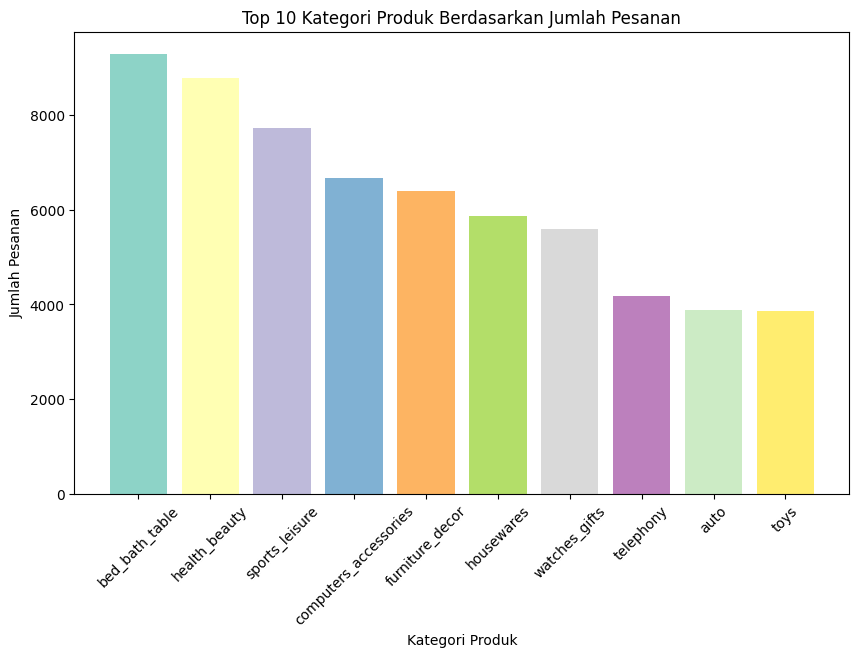

In [36]:
plt.figure(figsize=(10, 6))
colors = plt.cm.Set3(np.linspace(0, 1, len(top_10_order)))

plt.bar(top_10_order['product_category_name_english'], top_10_order['order_id'], color=colors)
plt.xlabel('Kategori Produk')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Pesanan')
plt.title('Top 10 Kategori Produk Berdasarkan Jumlah Pesanan')
plt.show()

### Pertanyaan 2: 10 produk yang menghasilkan total sales paling tinggi?

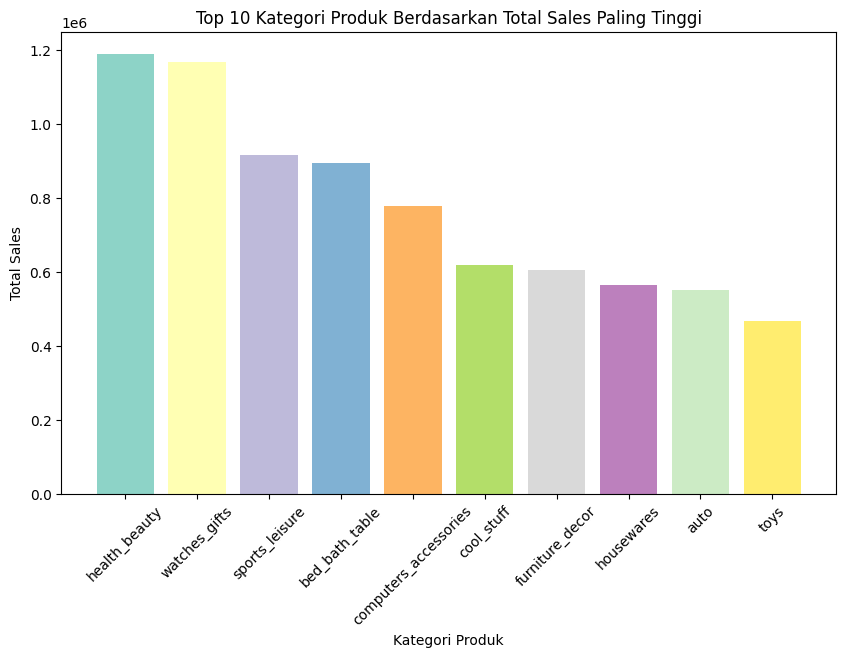

In [37]:
plt.figure(figsize=(10, 6))
colors = plt.cm.Set3(np.linspace(0, 1, len(total_sales)))

plt.bar(total_sales['product_category_name_english'], total_sales['price'], color=colors)
plt.xlabel('Kategori Produk')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.title('Top 10 Kategori Produk Berdasarkan Total Sales Paling Tinggi')
plt.show()

### Pertanyaan 3: 10 Produk yang mendapat review paling baik dari pelanggan?

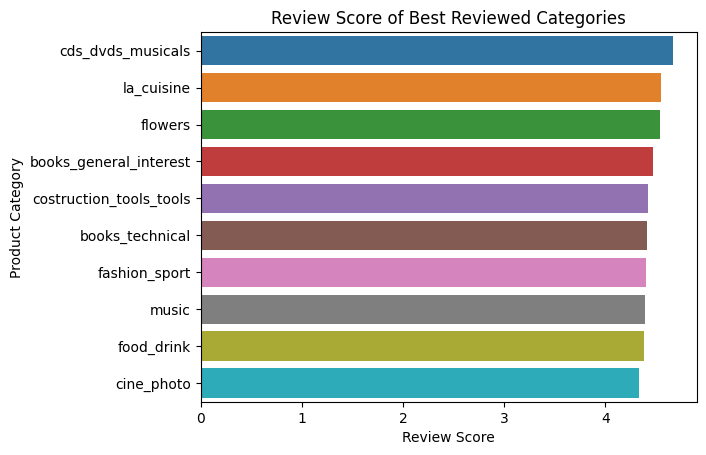

In [38]:
sns.barplot(
    x = 'review_score',
    y = 'product_category_name_english',
    data = rata_review
)
plt.xlabel('Review Score')
plt.ylabel('Product Category')
plt.title('Review Score of Best Reviewed Categories')
plt.show()

### Pertanyaan 4: Bagaimana pertumbuhan pemesanan produk dari 5 produk yang paling tinggi?

In [39]:
top_5_order = df_clean[['product_category_name_english','order_id']].groupby(['product_category_name_english']).count().sort_values(by = ['order_id'], ascending = False).head(5)
top_5_order

,order_id
product_category_name_english,
bed_bath_table,9298
health_beauty,8791
sports_leisure,7717
computers_accessories,6674
furniture_decor,6398


In [40]:
# memilih 10 product yang paling laris
grow_products = df_clean.query('product_category_name_english in @top_5_order.index')
grow_products

,product_id,order_id,product_category_name_english,price,review_score,day,month,year
3683,96bd76ec8810374ed1b65e291975717f,01f66e58769f84129811d43eefd187fb,sports_leisure,79.8,5.0,9,7,2018
3684,3bb7f144022e6732727d8d838a7b13b3,7f6209da874fb56bf2fd26791d83bcb8,sports_leisure,26.7,5.0,4,6,2017
3685,051b9ff13dd55c0a6655a15ff296f80d,ad979a858d9d6a2b8bbec764d452d1a9,sports_leisure,285.0,5.0,2,8,2018
3686,ce5b91848b91118daffb3af53b747475,2bfb6645f99e561b82bbdd84c98da7e1,sports_leisure,19.9,5.0,11,5,2018
3687,5eaa343860dc445b3fd43d1b682809fd,77338308426749365f169773fa614a56,sports_leisure,1090.0,5.0,15,8,2018
...,...,...,...,...,...,...,...,...
69776,c1cf541d5b33a4b04ddc1c3be7aa1c86,b2947cf9a8d3084369dfcbe9663dd545,health_beauty,38.0,5.0,24,8,2018
69777,c1cf541d5b33a4b04ddc1c3be7aa1c86,b9ce9285aa642df4742b9839964076c6,health_beauty,38.0,5.0,23,7,2018
69778,c1cf541d5b33a4b04ddc1c3be7aa1c86,c9df12344ba358f97f2ee696709f2415,health_beauty,38.0,5.0,6,8,2018
69779,c1cf541d5b33a4b04ddc1c3be7aa1c86,e1dd3bcc1f22b4213a185eec19606daf,health_beauty,38.0,1.0,21,7,2018


In [41]:
grow_order = pd.DataFrame(data = grow_products.groupby(['month', 'product_category_name_english'])['order_id'].count()).sort_values(by = ['order_id'], ascending = False)
grow_order.head()

,,order_id
month,product_category_name_english,
8,health_beauty,1116
6,health_beauty,1030
7,bed_bath_table,1016
8,bed_bath_table,990
7,health_beauty,985


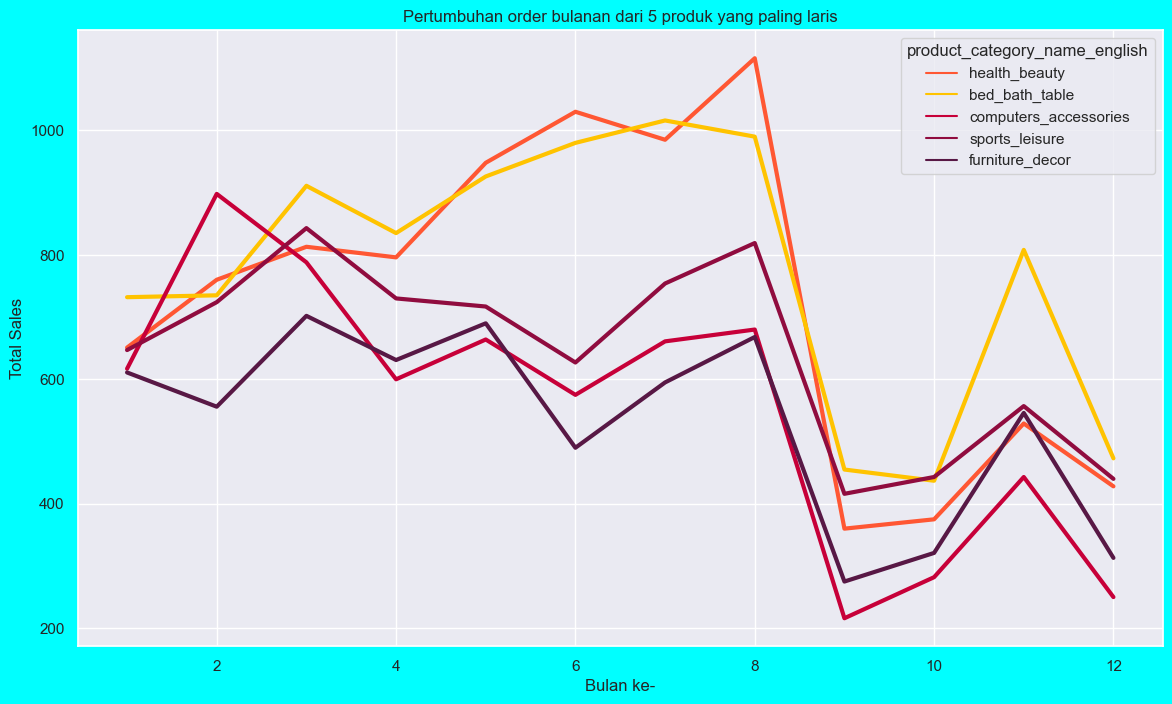

In [42]:
sns.set(rc={'figure.figsize':(14,8)})

# Mengubah latar belakang plot menjadi hitam
fig = plt.figure(facecolor='cyan')

custom_palette = ['#FF5733', '#FFC300', '#C70039', '#900C3F', '#581845'] 

ax = sns.lineplot(data=grow_order, x='month', y='order_id',
                  hue='product_category_name_english', palette=custom_palette,
                  legend='full', lw=3)

plt.title("Pertumbuhan order bulanan dari 5 produk yang paling laris")
plt.ylabel('Total Sales')
plt.xlabel('Bulan ke-')
plt.show()

## Conclusion

- Conclution pertanyaan 1 (10 produk apa yang paling banyak dibeli?)
  
Didapatkan hasil bahwa produk yang paling banyak di-order oleh customer adalah bed_bath_table dengan kuantitas order sebanyak 9298. Lalu, diikuti oleh product category health_beauty sebanyak 8791 dan produk sports_leisure sebanyak 7717. Sementara itu, product category yang menduduki posisi ke-10 adalah toyssebesar 3853 order.

- Conclution pertanyaan 2 (10 produk yang menghasilkan total sales paling tinggi?)

Didapatkan bahwa produk yang memberikan total sales paling tinggi adalah health_beauty, watches_gifts dan sports_leisure. Cukup menarik bed_bath_table dengan penjualan terbanyak namun untuk total sales berada pada posisi empat tertinggi.

- Conclution pertanyaan 3 (10 Produk yang mendapat review paling baik dari pelanggan?)

Review score rata-rata tertinggi adalah barang dengan kategori cds_dvds_musicals, la_cuisine, dan flowers.

- Conclution pertanyaan 4 (Bagaimana pertumbuhan pemesanan produk dari 5 produk yang paling tinggi?)

Saat memasuki bulan ke-8 terjadi puncak lonjakan penurunan order, pemesanan produk mengalami penurunan sampai bulan Desember. Meskipun sempat terjadi kenaikan order pada bulan ke-11 tetapi pemesanan produk perlahan-lahan kembali menurun sampai bulan ke-12.





Produk dengan tingkat penjualan tertinggi cenderung menghasilkan penjualan total sales yang tinggi juga. Namun, mulai dari bulan kedelapan, terjadi penurunan pesanan dan penjualan hingga bulan terakhir. Oleh karena itu, perusahaan perlu merancang strategi yang dapat segera diimplementasikan pada bulan ke-8 untuk mempertahankan peningkatan pesanan dan penjualan produk. Beberapa langkah yang dapat diambil adalah memberikan prioritas pada pemasangan iklan untuk produk yang paling laris, memberikan diskon khusus, atau menawarkan potongan harga ongkos kirim kepada pelanggan yang sering melakukan pemesanan.